In [592]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedata = pd.read_csv(mouse_drug_data_to_load)
trialdata = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined = pd.merge(mousedata, trialdata, on="Mouse ID")

# Display the data table for preview
combined.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [593]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group = combined.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

mean = pd.DataFrame(group)

mean = mean.reset_index()

mean.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [646]:
group = combined.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

error = pd.DataFrame(group)

error = error.reset_index()

error


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [647]:
# Standard Errors for Each Drug 

pd.pivot_table(error, values = 'Tumor Volume (mm3)', index = ['Timepoint'],
              columns = ['Drug'])


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [596]:
# Minor Data Munging to Re-Format the Data Frames
newtable = pd.pivot_table(combined, values = 'Tumor Volume (mm3)', index = ['Timepoint'],
                         columns = ['Drug'], aggfunc = np.mean)

# Preview that Reformatting worked
newtable


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


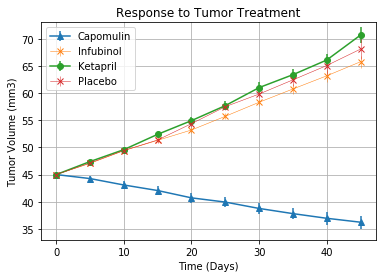

In [597]:
# Generate the Plot (with Error Bars)
x = np.arange(0, 50, 5)

capo_sample = newtable['Capomulin'] 
capo_error = error['Tumor Volume (mm3)'][0:10]
Infu_sample = newtable['Infubinol']
Infu_error = error['Tumor Volume (mm3)'][20:30]
keta_sample = newtable['Ketapril'] 
keta_error = error['Tumor Volume (mm3)'][40:50]
plac_sample = newtable['Placebo']
plac_error = error['Tumor Volume (mm3)'][60:70]

fig, ax = plt.subplots()
ax.errorbar(x, capo_sample, capo_error, fmt="-^", label = "Capomulin")
ax.errorbar(x, Infu_sample, Infu_error, fmt="-x", label = "Infubinol", linewidth=0.5)
ax.errorbar(x, keta_sample, keta_error, fmt="-o", label = "Ketapril")
ax.errorbar(x, plac_sample, plac_error, fmt="-x", label = "Placebo", linewidth=0.5)

#newtable.set_index('Drug Timepoint').plot(figsize=(10,5), grid=True)

plt.ylim(33, 73)
#plt.xlim(-0.5, 10.5)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Response to Tumor Treatment")
plt.grid()
plt.legend(loc="best")

#plt.legend(loc="best", fontsize="small", fancybox=True)

In [598]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [599]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combined.head()
x = combined.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']
meta = pd.DataFrame(x)

meta
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [600]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
err = combined.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

standard = pd.DataFrame(err)
standard
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [601]:
# Minor Data Munging to Re-Format the Data Frames
metatable = pd.pivot_table(combined, values = 'Metastatic Sites', index = ['Timepoint'],
                           columns = ['Drug'], aggfunc = np.mean)

metatable
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


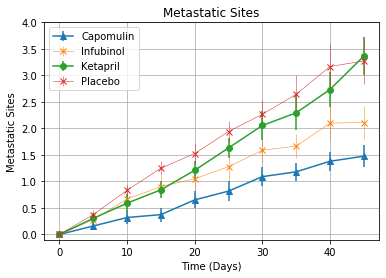

In [635]:
# Generate the Plot (with Error Bars)
x = np.arange(0, 50, 5)

capo_sample = metatable['Capomulin'] 
capo_error = standard['Metastatic Sites'][0:10]
Infu_sample = metatable['Infubinol']
Infu_error = standard['Metastatic Sites'][20:30]
keta_sample = metatable['Ketapril'] 
keta_error = standard['Metastatic Sites'][40:50]
plac_sample = metatable['Placebo']
plac_error = standard['Metastatic Sites'][60:70]

fig, ax = plt.subplots()
ax.errorbar(x, capo_sample, capo_error, fmt="-^", label = "Capomulin")
ax.errorbar(x, Infu_sample, Infu_error, fmt="-x", label = "Infubinol", linewidth=0.5)
ax.errorbar(x, keta_sample, keta_error, fmt="-o", label = "Ketapril")
ax.errorbar(x, plac_sample, plac_error, fmt="-x", label = "Placebo", linewidth=0.5)
#[ax.errorbar(caposample[0],caposample[x]) for x in range(1,len(caposample[:,0]))]

plt.ylim(-0.1, 4)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Metastatic Sites")
ax.set_title("Metastatic Sites")
plt.grid()
plt.legend(loc="best")
# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [603]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
group = combined.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]
mice = pd.DataFrame(group)
mice = mice.reset_index()
mice = mice.rename(columns={'Mouse ID': 'Mouse Count'})
mice.head()

# Convert to DataFrame
# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [604]:
# Minor Data Munging to Re-Format the Data Frames
micecount = pd.pivot_table(combined, values = 'Mouse ID', index = ['Timepoint'],
                           columns = ['Drug'], aggfunc= len) #lambda x: len(x.unique())) #<- What is lambda???

micecount

#new = micecount.apply(lambda micecount: micecount / micecount.sum())

#new
 
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [605]:
#convert to percent loss

newcount = (100. * (micecount / micecount.max())).round(2)
newcount


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.15,100.0,96.15,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.46,96.0,88.46,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.38,96.0,88.46,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.38,92.0,80.77,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.85,92.0,73.08,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.00,92.0,69.23,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.46,84.0,61.54,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.62,80.0,46.15,56.0


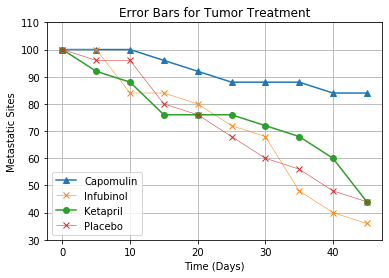

In [606]:
# Generate the Plot (Accounting for percentages)
x = np.arange(0, 50, 5)

capo_sample = newcount['Capomulin']
Infu_sample = newcount['Infubinol']
keta_sample = newcount['Ketapril'] 
plac_sample = newcount['Placebo']

fig, ax = plt.subplots()
ax.errorbar(x, capo_sample, fmt="-^", label = "Capomulin")
ax.errorbar(x, Infu_sample, fmt="-x", label = "Infubinol", linewidth=0.5)
ax.errorbar(x, keta_sample, fmt="-o", label = "Ketapril")
ax.errorbar(x, plac_sample, fmt="-x", label = "Placebo", linewidth=0.5)

plt.ylim(30, 110)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Metastatic Sites")
ax.set_title("Error Bars for Tumor Treatment")
plt.grid()
plt.legend(loc="best")

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [629]:
# Calculate the percent changes for each drug
per_change = (newtable.iloc[-1] - newtable.iloc[0]) / newtable.iloc[0] * 100

per_change

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

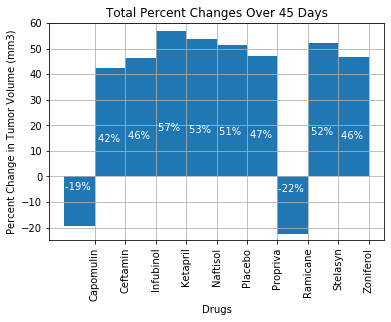

In [631]:
t = tuple(per_change)
a = t[0], 
b = t[1:6]
c = t[7],  
d = t[8:9]
#not sure where to use these tuples 

labels = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva'
         , 'Ramicane', 'Stelasyn', 'Zoniferol']

fig, ax = plt.subplots()

first_g = ax.bar(labels, per_change, width = 1)   

ax.set_ylim(-25,60)
ax.set_ylabel('Percent Change in Tumor Volume (mm3)')
ax.set_xlabel('Drugs')
ax.set_title('Total Percent Changes Over 45 Days')
ax.set_xticks(np.arange(0.5, 10)) # set the position of the x ticks
ax.set_xticklabels(labels, rotation = "vertical")

def label(graphs):
    for graph in graphs:
        height = graph.get_height()
        ax.text(graph.get_x() + graph.get_width()/2., 0.3*height,
                '%d%% ' % int(height),
                ha='center', va='bottom', color = "white")


label(first_g)
plt.grid()

#plt.show()

#for i, (p, pr) in enumerate(per_change.index, per_change):
#    plt.text(s=p, x=1, y=i, color="w", verticalalignment="center", size=18)
#    plt.text(s=str(pr)+"%", x=pr-5, y=i, color="w",
#             verticalalignment="center", horizontalalignment="left", size=18)
#plt.figure(figsize = (10,10))
#plt.bar(labels, per_change, width = 1)
#plt.show()


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)